<h1> Utrecht Summer School 'Introduction to Complex Systems' </h1>
<h2> Day 2. Project Networks - Kuramoto </h2>

This Jupyter notebook contains the parameters that can be changed. It calls the function that will perform the simulation, computation and visualisation. Only this notebook needs to be amended.

<h3> Dependencies </h3>

The codes used in this project depend on complementary Python files. Specificially, the following packages need to be installed.
<h4> Packages needed </h4>
<ul>
    <li> numpy </li>
    <li> matplotlib </li>
    <li> IPython </li>
    <li> networkx </li>
</ul>

<h1> Import the python codes </h1>

In [20]:
## DO NOT CHANGE THIS
%matplotlib inline

from Kuramoto_functions import Kuramoto_simulator

import numpy as np

import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

C:\Users\guilh\AppData\Local\Temp\ipykernel_3464\1678906085.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1> Parameters </h1>

In [21]:
# Parameters are packed into a class for easy passing of all parameter values to the simulator function

class Parameters:
    ## GENERAL PARAMETERS
    
    # Number of oscillators
    N = 20
    
    # Coupling Strength
    K = 1
    
    # Order parameter function
    def orderParameter(x):
        return np.abs( np.sum(np.exp(1j*x)) )/len(x)
        
    ## Connections between oscillators
    A = np.ones((N,N)) - np.eye(N)
    
    # A = np.diag( np.ones(N-1), 1) + np.diag( np.ones(N-1), -1)

    # p = 0.1
    # A = np.triu( np.random.rand(N,N) < p, 1)
    # A = A + A.transpose()
    # A = A.astype(int)
    
# Finally, we create one instance of this class that now contains all parameters
par = Parameters

<h1> Simulation Settings </h1>

In [22]:
# Simulation settings are packed into a class for easy passing of all settings to the simulator function

class SimSettings:
    
    updatePlot = False # do we want to update the plot during the simulation?
    plotEvolution = True # do we plot the evolutions after the simulation?
    
    plot_interval = 10 # Output a new figure every so many time steps
    
    T = 400 # Endtime
    dt = 0.1 # simulation timestep
    
# Finally, we create one instance of this class that now contains all settings
sim_set = SimSettings

<h1> Actual Simulation </h1>

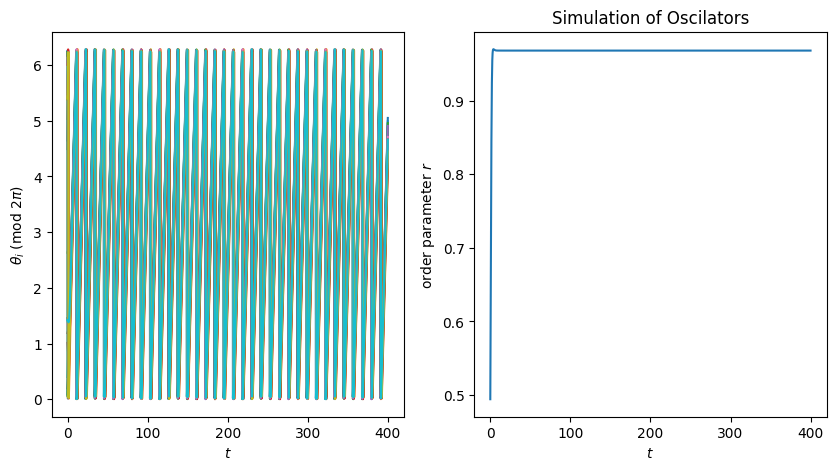

In [23]:
# The function is given all parameters as input
# The output is a list of the values of the order parameter over time
thetas, orderPar = Kuramoto_simulator(par, sim_set)

## Frequencies of the Oscilators

Text(0.5, 1.0, 'FFT of Oscilators')

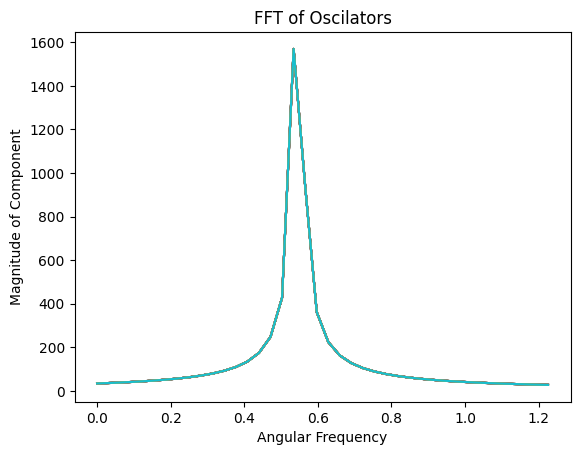

In [24]:
timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps*0.50)
sampleTime = (timesteps - start) / timesteps * sim_set.T


for index in range(par.N):
    mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
    omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi
    plt.plot(omegas[0:40], mags[0:40], label=f"Oscilador {index}")
    plt.ylabel("Magnitude of Component")
    plt.xlabel("Angular Frequency")
plt.title(f"FFT of Oscilators")

## Variation with Coupling Strength

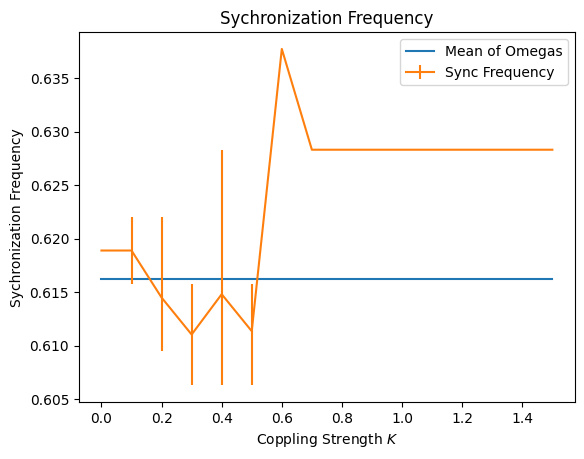

In [25]:
sim_set.plotEvolution = False
tests = 16
samples = 10

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

kk = np.linspace(0, 1.5, tests)
omega = np.random.rand(par.N)
omegaMean = np.ones(tests) * np.mean(omega)

finalOmega = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    par.K = kk[testIndex]

    finalOmega += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])


plt.plot(kk, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(kk, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title("Sychronization Frequency")
plt.ylabel("Sychronization Frequency")
plt.xlabel("Coppling Strength $K$")
plt.show()

## Variation with Natural Frequencies

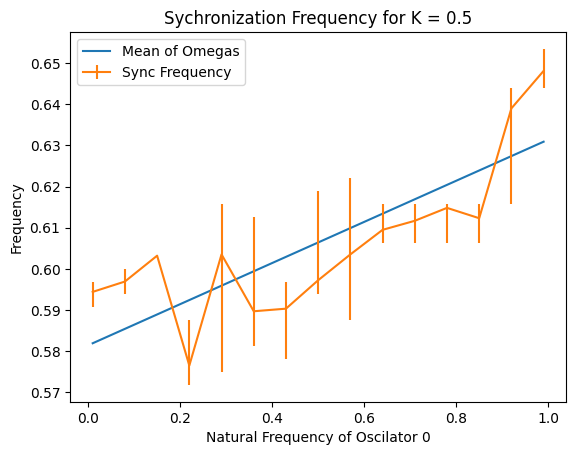

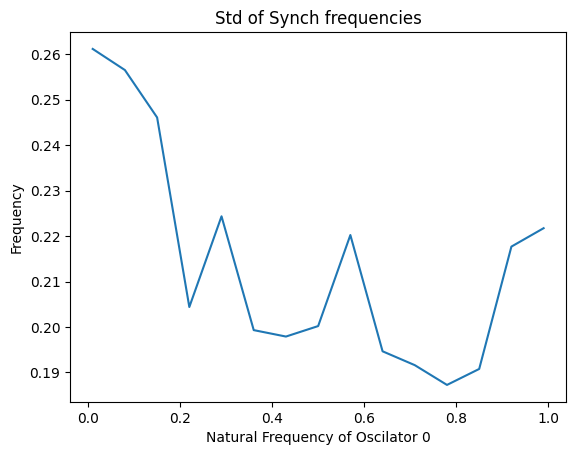

In [28]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 0.5

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Synch frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

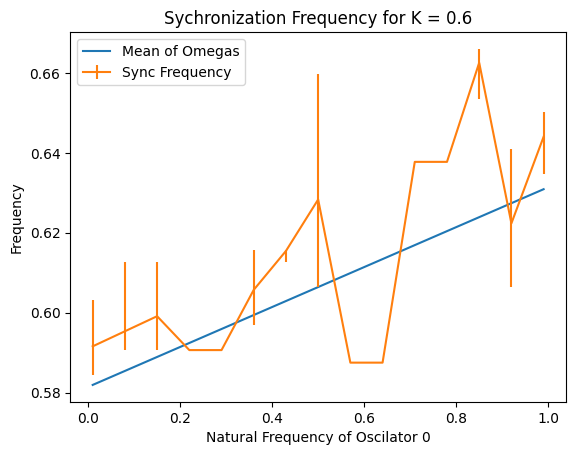

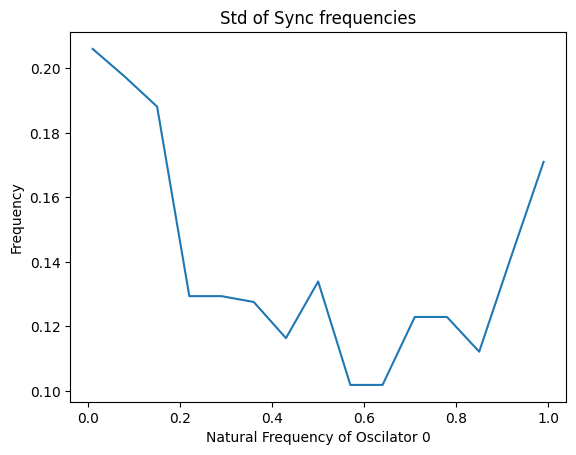

In [29]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 0.6

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Sync frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

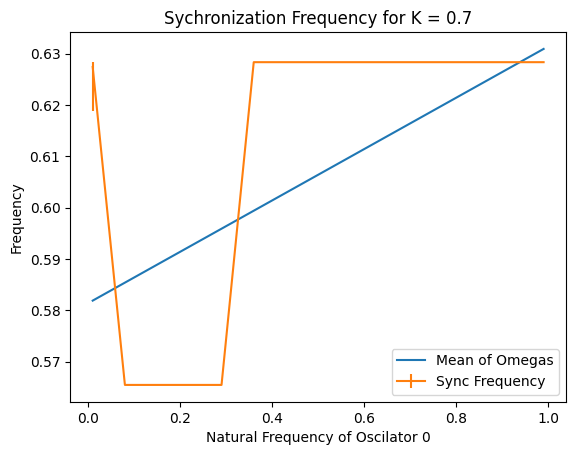

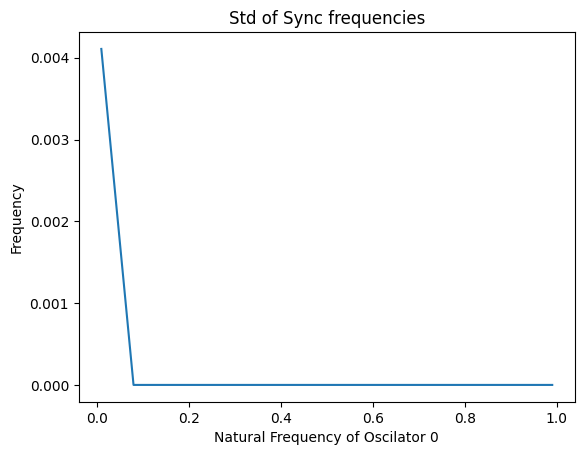

In [31]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 0.7

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Sync frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

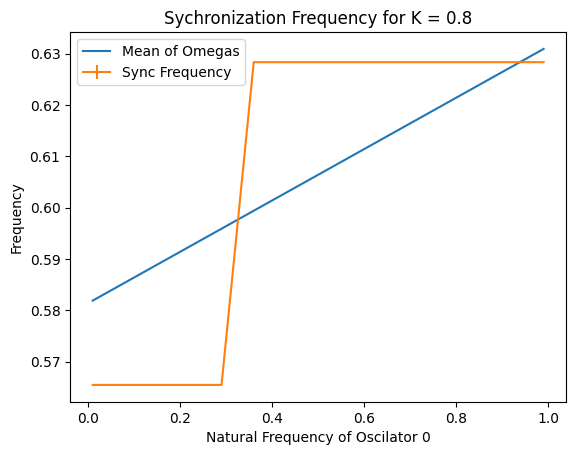

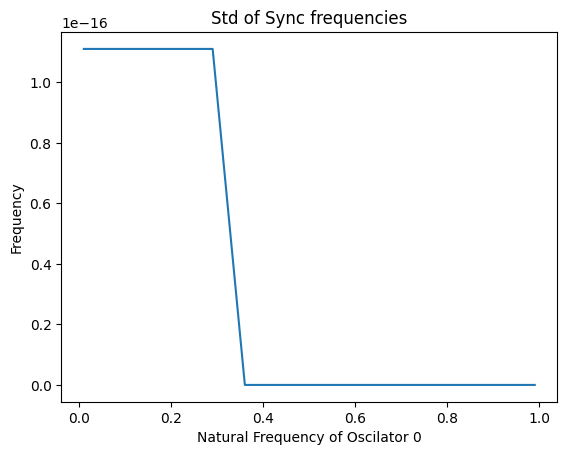

In [34]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 0.8

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Sync frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

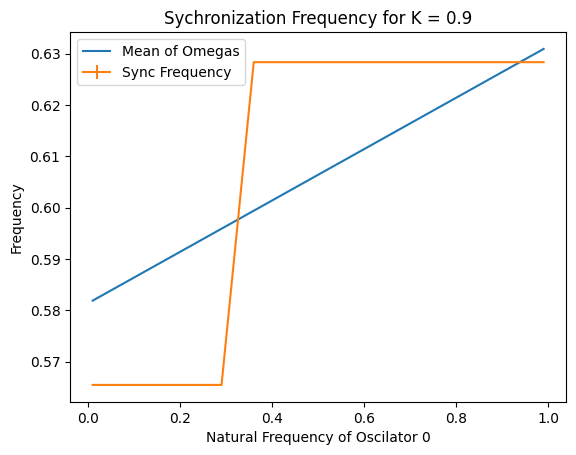

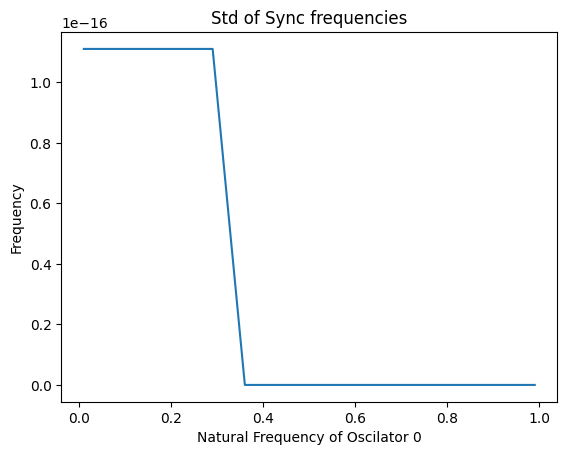

In [33]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 0.9

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Sync frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

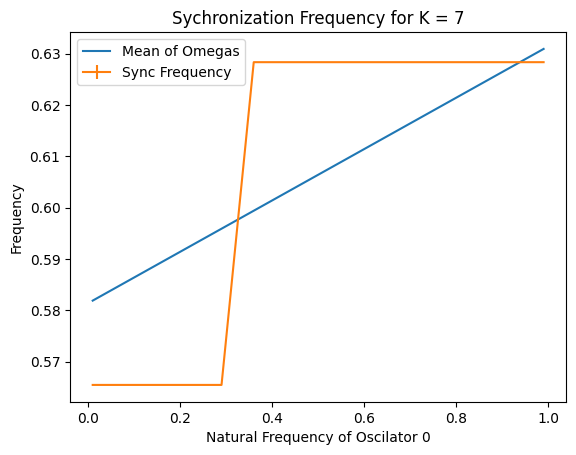

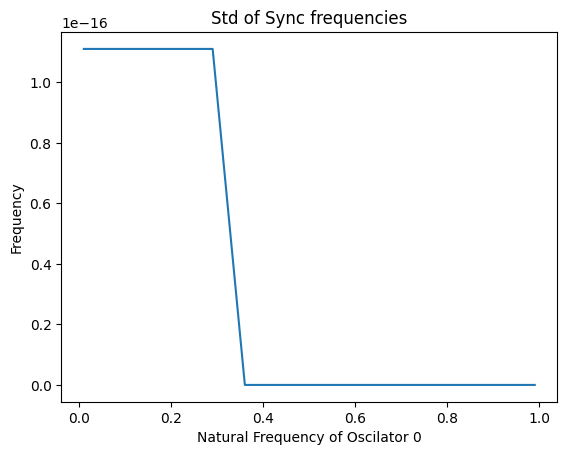

In [32]:
sim_set.plotEvolution = False
tests = 15
samples = 10

par.K = 7

timesteps = int(sim_set.T / sim_set.dt)
start = int(timesteps * 0.75)
sampleTime = (timesteps - start) / timesteps * sim_set.T

# omega = np.random.rand(par.N)
omegaTest = np.linspace(0.01, 0.99, tests)
omegaMean = []

finalOmega = []
finalOmegaStd = []
finalOmegaMin = []
finalOmegaMax = []
for testIndex in range(tests):
    omega[0] = omegaTest[testIndex]
    omegaMean += [np.mean(omega)]

    finalOmega += [[]]
    finalOmegaStd += [[]]
    for _ in range(samples):
        thetas, orderPar = Kuramoto_simulator(par, sim_set, omega=omega)

        oscilators = []
        for index in range(par.N):
            mags = np.abs(np.fft.fft(np.exp(1j * thetas[index, start:])))
            omegas = (np.arange(0, len(mags)) / sampleTime) * 2 * np.pi

            oscilators += [omegas[list(mags).index(np.max(mags))]]
        
        finalOmega[-1] += [np.mean(oscilators)]
        finalOmegaStd[-1] += [np.std(oscilators)]
    
    finalOmegaMin += [min(finalOmega[-1])]
    finalOmegaMax += [max(finalOmega[-1])]
    finalOmega[-1] = np.mean(finalOmega[-1])
    finalOmegaStd[-1] = np.mean(finalOmegaStd[-1])

    finalOmegaMin[-1] = abs(finalOmega[-1] - finalOmegaMin[-1])
    finalOmegaMax[-1] = abs(finalOmegaMax[-1] - finalOmega[-1])
    

plt.plot(omegaTest, omegaMean, label="Mean of Omegas", c='#1f77b4')
plt.errorbar(omegaTest, finalOmega, yerr=[finalOmegaMin, finalOmegaMax], label="Sync Frequency", c='#ff7f0e')
plt.legend()
plt.title(f"Sychronization Frequency for K = {par.K}")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()

plt.plot(omegaTest, finalOmegaStd)
plt.title("Std of Sync frequencies")
plt.ylabel("Frequency")
plt.xlabel("Natural Frequency of Oscilator 0")
plt.show()